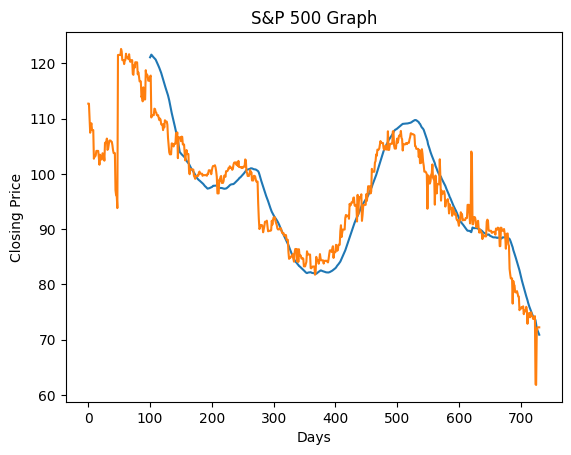

In [27]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

def findCoefficientA(x, y):
    x = np.array(x)
    y = np.array(y)

    crossN = np.sum(x*y)-np.size(x)*np.mean(x)*np.mean(y)
    crossD = np.sum(x*x)-np.size(x)*np.mean(x)*np.mean(x)

    a = crossN/crossD
    return a

def findCoefficientB(x, y, a):
    x = np.array(x)
    y = np.array(y)

    b = np.mean(y) - a*np.mean(x)
    return b

ds = pd.read_csv("datasets/sandp500.csv")

ds['Date'] = pd.to_datetime(ds['Date'])
ds = ds.sort_values(by = 'Date')

dates = []
i = 0
for val in ds['Date']:
    dates.append(i)
    i=i+1

prices = []
for val in ds['Close']:
    prices.append(val)

x = []
y = []
i = 0
for val in ds['Close']:
    if i >= 100:
        break
    x.append(i)
    y.append(val)
    i=i+1

xTemp = []
yTemp = []
for i, val in enumerate(ds['Close']):
    
    if i < 100:
        continue
    a = findCoefficientA(x,y)
    b = findCoefficientB(x,y,a)

    xTemp.append(i)
    yTemp.append(b+a*i)

    x.append(i)
    y.append(val)

    x.pop(0)
    y.pop(0)
    
a = findCoefficientA(x,y)
b = findCoefficientB(x,y,a)

xTemp.append(i)
yTemp.append(b+a*i)


xx = np.array(xTemp)
yy = np.array(yTemp)

plt.plot(xx,yy)

plt.plot(dates, prices)

plt.title("S&P 500 Graph")
plt.xlabel("Days")
plt.ylabel("Closing Price")

plt.show()

# r2 = r2_score(y, y_pred)
# print(r2)
